# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact_manual,interact
import wordcloud
import missingno
import warnings as wa
wa.filterwarnings('ignore')

In [2]:
data=pd.read_csv('startup_funding.csv')
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [4]:
data.shape

(3044, 10)

# Handling missing Data

<AxesSubplot:>

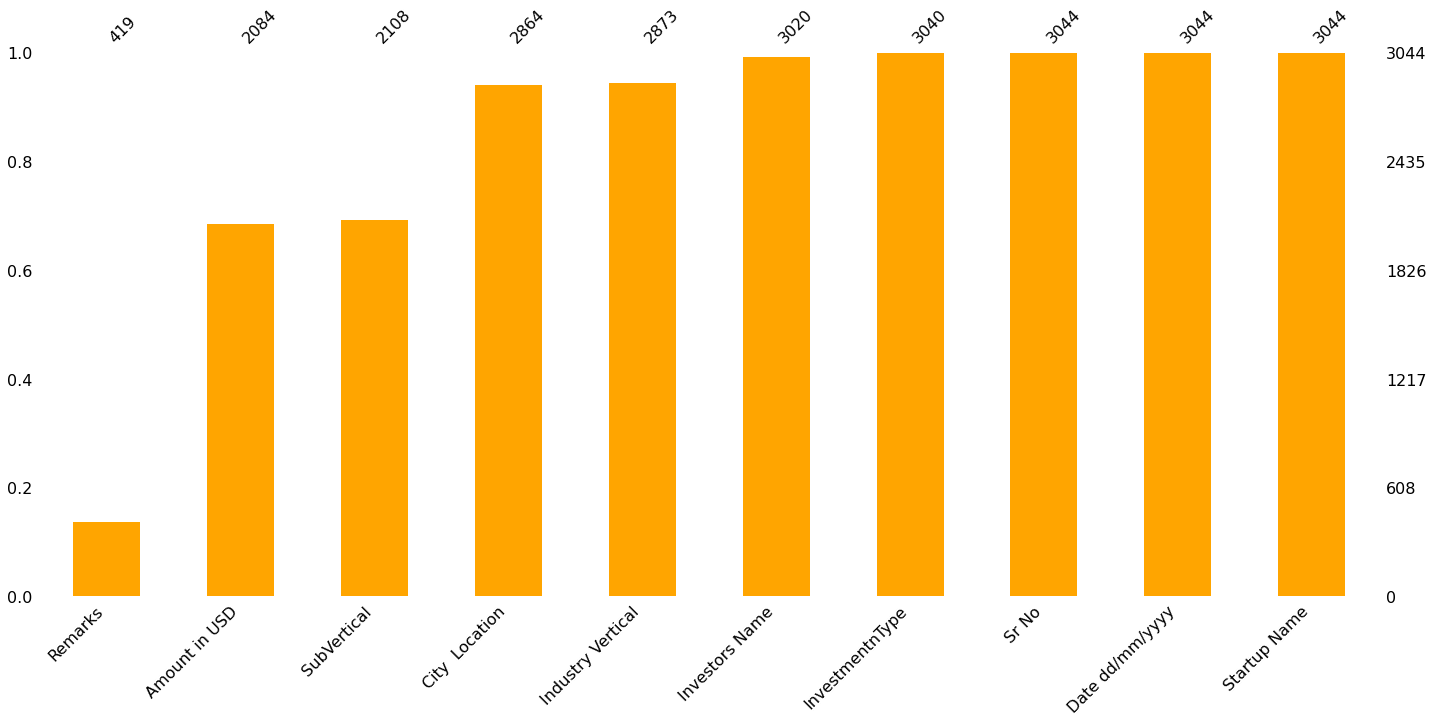

In [5]:
missingno.bar(data,sort='ascending',color='orange')

In [6]:
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]
def cleanstring(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

for col in ["StartupName", "IndustryVertical", "SubVertical", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
                                  data[col]=data[col].apply(cleanstring)          

In [7]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [8]:
total=data.isnull().sum().sort_values(ascending=False)
percentage=round(100*(data.isnull().sum()/data.isnull().count()))

In [9]:
pd.concat([total,percentage],keys=["Total","percentage %"],axis=1)

,Total,percentage %
City,180,6.0
SNo,0,0.0
Date,0,0.0
StartupName,0,0.0
IndustryVertical,0,0.0
SubVertical,0,0.0
InvestorsName,0,0.0
InvestmentType,0,0.0
AmountInUSD,0,0.0
Remarks,0,0.0


In [10]:
data=data.drop(['Remarks'],axis=1)

In [11]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [12]:
data['AmountInUSD']

0       20,00,00,000
1          80,48,394
2        1,83,58,860
3          30,00,000
4          18,00,000
            ...     
3039       45,00,000
3040        8,25,000
3041       15,00,000
3042             nan
3043        1,40,000
Name: AmountInUSD, Length: 3044, dtype: object

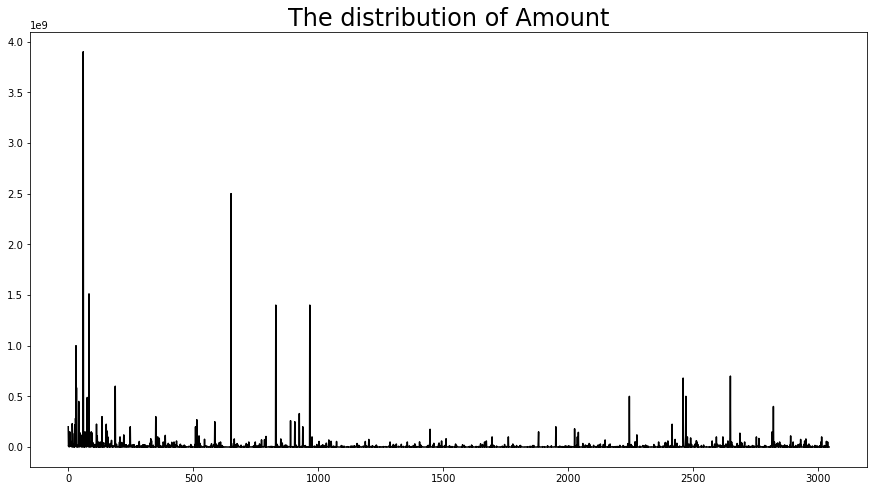

In [13]:
def Clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '': x = '-999'
    return int(x)

data['AmountInUSD']=data['AmountInUSD'].apply(Clean_amount)

plt.rcParams['figure.figsize']=(15,8)
data['AmountInUSD'].plot(kind='line',color='black')
plt.title("The distribution of Amount",fontsize=24)
plt.show()
        
        

In [14]:
## Cleaning the dates

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

# Query analysis and data visulisation

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


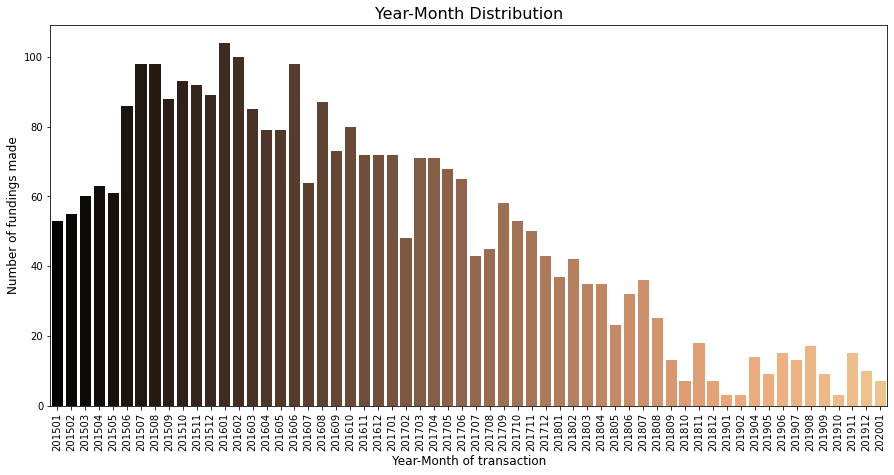

In [15]:
# How Does the Funding Ecosystem changes with respect to Time?
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

In [16]:
# The maximum funding of a startup
print("The maximum funding of a startup:",data['AmountInUSD'].max())

The maximum funding of a startup: 3900000000


In [17]:
# The minimum funding of a startup
print("The minimum funding of a startup:",data['AmountInUSD'].min())

The minimum funding of a startup: -999


In [18]:
@interact
#funding more than 50crores
def check(column=data['AmountInUSD'],fund=50000000):
    return data[data['AmountInUSD']<=fund].sort_values(by='AmountInUSD',ascending=False).style.background_gradient(cmap='Blues')

interactive(children=(Dropdown(description='column', options=(200000000, 8048394, 18358860, 3000000, 1800000, …

In [19]:
data[data.StartupName=='Paytm']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1000000000,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8950000,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1400000000,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,60000000,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,680000000,201509
2890,2891,13/03/2015,Paytm,nan,nan,NaN,Ratan Tata,Private Equity,-999,201503
2948,2949,05/02/2015,Paytm,nan,nan,NaN,Ant Financial Services (Alipay),Private Equity,-999,201502


In [20]:
#Name with lowest funding name
data[['AmountInUSD','StartupName']].sort_values(by='AmountInUSD',ascending=True).style.background_gradient(cmap='turbo_r')

,AmountInUSD,StartupName
2125,-999,Splitkart
1464,-999,TAC Security
708,-999,FableStreet
709,-999,Monsoon Fintech
710,-999,MonkeyBox
1463,-999,Fitternity
2166,-999,STAGE 3
713,-999,Creator\\xe2\\x80\\x99s Gurukul
2465,-999,LoanCircle
1461,-999,Zzungry


In [21]:
#comapny with no funding
data[data['AmountInUSD']==-999].style.background_gradient(cmap='inferno')

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
20,21,17/11/2019,Burger Singh,Food and Beverage,Indian Burger Brand,Gurgaon,RB Investments,Venture,-999,201911
34,35,21/10/2019,The Man Company,Consumer Goods,Beauty and Grooming,Gurgaon,Ayushmann Khurana,Corporate Round,-999,201910
58,59,19/08/2019,Mishry Reviews,Services,Product Review,Gurgaon,Vir Sanghvi,Series A,-999,201908
89,90,06/05/2019,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,-999,201905
91,92,05/05/2019,StyleDotMe,E-commerce,Fashion and Shopping,Delhi,"Indian Angel Network and other angel investors, Innov8 founder Ritesh Malik, Josh Talks founders Supriya Paul and Shobha Banga, and former Hero Corporate president Rohit Chanana",Bridge Round,-999,201905
112,113,01/02/2019,FleetX,AI,Logistics,Gurgaon,India Quotient and LetsVenture\\xe2\\x80\\x99s Angel Fund,Pre Series A,-999,201902
139,140,22/11/2018,Skillbox,Social Network,Art,Gurugram,Individual investors,Seed Funding,-999,201811
144,145,01/10/2018,Northmist,Fashion,Mens Wear,Delhi,Prashant Jaiswal,Seed/ Angel Funding,-999,201810
155,156,04/09/2018,HappyGoEasy,Consumer Internet,Online Travel Agecy,Gurugram,"Korea Investment Partners (KIP), Samsung and China-based CITIC Capital and others",Private Equity,-999,201809
157,158,05/09/2018,Mad Street Den,Technology,Computer Vision And Artificial Intelligence (Ai) Platform,Chennai,KDDI,Private Equity,-999,201809


In [22]:
#The average mean of the funding
print("the Average funding of the starturp",data['AmountInUSD'].dropna().mean())

the Average funding of the starturp 13270058.261169514


Total Startups funded: 2457
Swiggy           8
Ola Cabs         8
Paytm            7
NoBroker         6
Medinfi          6
Nykaa            6
Meesho           6
UrbanClap        6
Jugnoo           5
Capital Float    5
Name: StartupName, dtype: int64


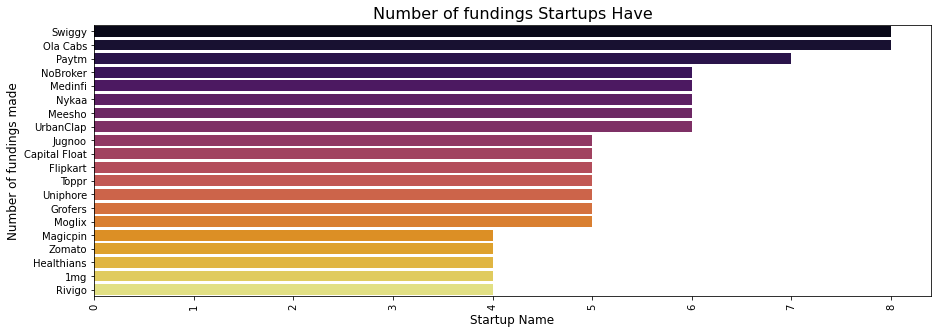

In [23]:
print("Total Startups funded:",len(data['StartupName'].unique()))
print(data['StartupName'].value_counts().head(10))
plt.rcParams['figure.figsize'] = (15, 5)
startupname=data['StartupName'].value_counts().head(20)
sns.barplot(y=startupname.index,x=startupname.values,palette='inferno')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

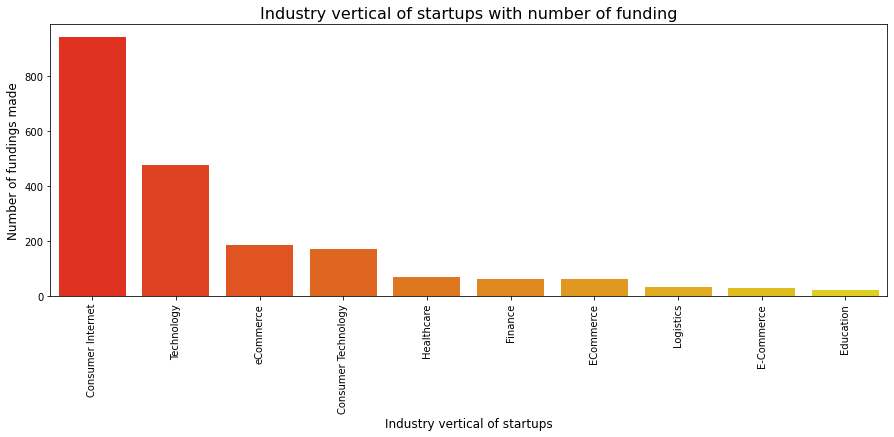

In [24]:
data['IndustryVertical']=data['IndustryVertical'].replace('nan','Consumer Technology')
industry=data['IndustryVertical'].value_counts().head(10)
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()


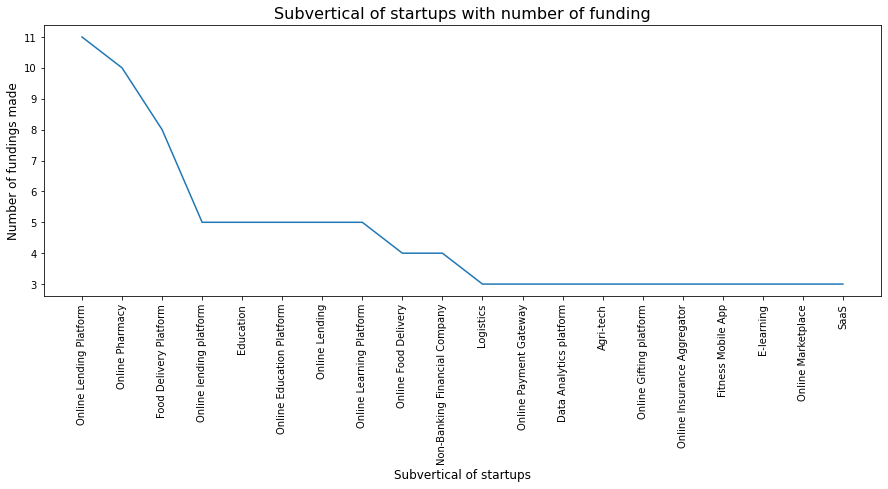

In [25]:
# lets analyze the sub vertical industries
industry = data['SubVertical'].value_counts()[1:].head(20)
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

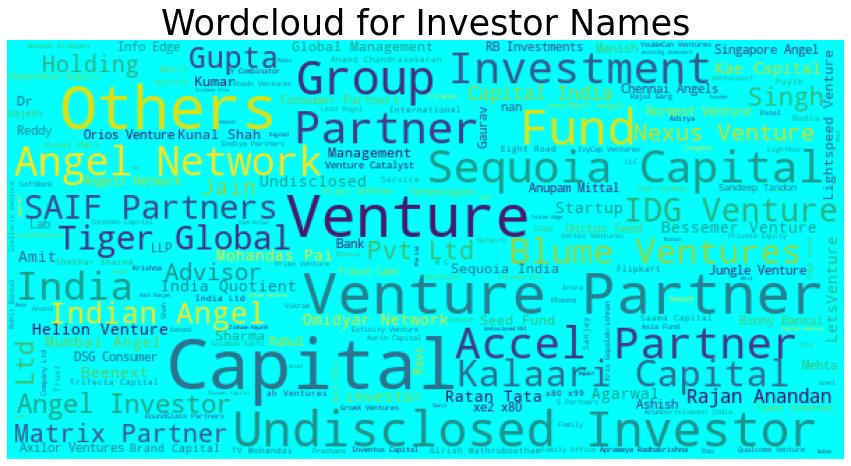

In [39]:
from wordcloud import WordCloud
names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()